In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import random 
from datetime import datetime 

In [9]:
def Model2_Simulation(q1, q2, lambda_1, lambda_2, lambda_3, lambda_4, gamma_11, gamma_12, gamma_21, gamma_22, TERM):
    r1 = 1-q1
    r2 = 1-q2
    TNOW = 0  
    Q1 = 0
    Q2 = 0
    Q3 = 0 
    Q4 = 0
    AQ1 = 0 
    AQ2 = 0 
    AQ3=0
    AQ4 = 0 
    
    # Initialise number of iterations to be 0 
    iteration = 0 
    #Initialise number of arrivals, matches and abandonments to be 0 
    Matches_CE = 0
    Matches_EE = 0 
    Matches_JC = 0
    Matches_JE = 0
    
    # (can add in arrivals of C1 and C2 separately if needed)
    Arrivals_CE = 0
    Arrivals_EE = 0 
    Arrivals_JC = 0
    Arrivals_JE = 0
    
    Abandonment_CE = 0
    Abandonment_EE = 0
    Abandonment_JC = 0
    Abandonment_JE = 0
    
     
    # Initalise vector to store the time 
    Time_v = []
    
    # Initialize event calander to be a 4d vector 
    EC= ([0]*5)
    EC[0] = -(np.log(1-np.random.uniform(0, 1))/lambda_1)
    EC[1] = -(np.log(1-np.random.uniform(0, 1))/lambda_2)
    EC[2] = -(np.log(1-np.random.uniform(0, 1))/lambda_3)
    EC[3] = -(np.log(1-np.random.uniform(0, 1))/lambda_4)
    EC[4] = TERM
    EC = np.array(EC)
    
    while TNOW < TERM:
        
        iteration += 1
        
        # Time of next event is minimum entry in event calender
        TNEXT = EC.min()
        
        # Type of next event (index of minimum entry in event calender)
        ENEXT = EC.argmin()
        
        # Update area statistics
        AQ1 += ((TNEXT-TNOW)*Q1)
        AQ2 += ((TNEXT-TNOW)*Q2)
        AQ3 += ((TNEXT-TNOW)*Q3)
        AQ4 += ((TNEXT-TNOW)*Q4)
        
        # Update time vector 
        TNOW = TNEXT
        Time_v = np.append(Time_v, TNOW)
        
        # Next event is arrival of a class 1 CE (Q1)
        if(ENEXT==0):
            
            # Increase CE arrivals by 1
            Arrivals_CE += 1 
            
            # Initialise m=0 to be the matchings found for this CE 
            m=0
            
            # If there are class 2 CEs to match with first check these
            if(Q3 > 0):
                
                # Loop through each C2 CE and check for matching 
                for i in range(Q3):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r1)):
                        
                        # CE matches with CE and they both leave system 
                        m += 1 
                        Q3 -= 1 
                        
                        # Increase CE matches by 2
                        Matches_CE += 1
                        Matches_JC += 1
                        
                        # Update event calender to remove abandonment time of the Q3 (C2 CE)
                        EC = np.delete(EC, (5+Q1+Q2+i))
                
                        break
                    
            # If no matches yet and there are C2 EEs to match with         
            if(Q4 > 0 and m==0):
                
                # Loop through each C2 EE and check for matching 
                for i in range(Q4):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r2)):
                        
                        # CE matches with EE and they both leave system 
                        m += 1 
                        Q4 -= 1 
                        
                        # Increase CE and EE matches by 1
                        Matches_CE += 1
                        Matches_JE += 1 
                        
                        # Update event calender to remove abandonment time of the Q4 (C2 EE)
                        EC = np.delete(EC, (5+Q1+Q2+Q3+i))
                
                        break
                    
            # If there are no matches found or possible    
            if(m == 0):
                
                # Update EC to inlclude abandonment time of the arrived C1 CE (Q1)
                EC=np.insert(EC, (5+Q1), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_11)))
                
                # Joins queue 
                Q1 += 1
                
        # Update EC to include next arrival time of CE
            EC[0]=TNOW -(np.log(1-np.random.uniform(0, 1))/lambda_1)
        
        # Next event is arrival of a class 1 EE (Q2)
        elif(ENEXT==1):
            
            # Increase EE arrivals by 1
            Arrivals_EE += 1 
            
            # Initialise m=0 to be the matchings found for this EE 
            m=0
            
            # If there are JEs to match with first check these
            if(Q4 > 0):
                
                # Loop through each JE and check for matching 
                for i in range(Q4):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r1)):
                        
                        # EE matches with EE and they both leave system 
                        m += 1 
                        Q4 -= 1 
                        
                        # Increase EE and JE matches by 1
                        Matches_EE += 1
                        Matches_JE += 1 
                        
                        # Update event calender to remove abandonment time of the Q4 (C2 EE)
                        EC = np.delete(EC, (5+Q1+Q2+Q3+i))
                
                        break
                    
            # If no matches yet and there are JC to match with         
            if(Q3 > 0 and m==0):
                
                # Loop through each JC and check for matching 
                for i in range(Q3):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r2)):
                        
                        # EE matches with JC and they both leave system 
                        m += 1 
                        Q3 -= 1 
                        
                        # Increase EE and JC matches by 
                        Matches_EE += 1
                        Matches_JC += 1
                        
                        # Update event calender to remove abandonment time of the Q3 (JC)
                        EC = np.delete(EC, (5+Q1+Q2+i))
                
                        break
                    
            # If there are no matches found or possible    
            if(m == 0):
                
                # Update EC to inlclude abandonment time of the arrived C1 CE (Q1)
                EC=np.insert(EC, (5+Q1+Q2), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_12)))
                
                # Joins queue 
                Q2 += 1
                
        # Update EC to include next arrival time of EE
            EC[1]=TNOW -(np.log(1-np.random.uniform(0, 1))/lambda_2)
        
        # Next event is arrival of a class 2 CE (Q3)
        elif(ENEXT==2):
            
            # Increase JC arrivals by 1
            Arrivals_JC += 1 
            
            # Initialise m=0 to be the matchings found for this CE 
            m=0
            
            # If there are class 1 CEs to match with first check these
            if(Q1 > 0):
                
                # Loop through each C1 CE and check for matching 
                for i in range(Q1):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r1)):
                        
                        # CE matches with CE and they both leave system 
                        m += 1 
                        Q1 -= 1 
                        
                        # Increase CE matches by 2
                        Matches_CE += 1
                        Matches_JC += 1 
                        
                        # Update event calender to remove abandonment time of the Q1 (C1 CE)
                        EC = np.delete(EC, (5+i))
                
                        break
                    
            # If no matches yet and there are C1 EEs to match with         
            if(Q2 > 0 and m==0):
                
                # Loop through each C1 EE and check for matching 
                for i in range(Q2):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r2)):
                        
                        # CE matches with EE and they both leave system 
                        m += 1 
                        Q2 -= 1 
                        
                        # Increase CE and EE matches by 1
                        Matches_EE += 1
                        Matches_JC += 1 
                        
                        # Update event calender to remove abandonment time of the Q2 (C1 EE)
                        EC = np.delete(EC, (5+Q1+i))
                
                        break
                    
            # If there are no matches found or possible    
            if(m == 0):
                
                # Update EC to inlclude abandonment time of the arrived C2 CE (Q3)
                EC=np.insert(EC, (5+Q1+Q2+Q3), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_21)))
                
                # Joins queue 
                Q3 += 1
                
        # Update EC to include next arrival time of CE
            EC[2]=TNOW -(np.log(1-np.random.uniform(0, 1))/lambda_3)
        
        
        # Next event is arrival of a class 2 EE (Q4)
        elif(ENEXT==3):
            
            # Increase EE arrivals by 1
            Arrivals_JE += 1 
            
            # Initialise m=0 to be the matchings found for this EE 
            m=0
            
            # If there are JEs to match with first check these
            if(Q2 > 0):
                
                # Loop through each C1 CE and check for matching 
                for i in range(Q2):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r1)):
                        
                        # JE matches with EE and they both leave system 
                        m += 1 
                        Q2 -= 1 
                        
                        # Increase EE and JE matches by 1
                        Matches_JE += 1
                        Matches_EE += 1 
                        
                        # Update event calender to remove abandonment time of the Q2 (C1 CE)
                        EC = np.delete(EC, (5+Q1+i))
                
                        break
                    
            # If no matches yet and there are CEs to match with         
            if(Q1 > 0 and m==0):
                
                # Loop through each C1 EE and check for matching 
                for i in range(Q1):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r2)):
                        
                        # EE matches with EE and they both leave system 
                        m += 1 
                        Q1 -= 1 
                        
                        # Increase JE and CE matches by 1
                        Matches_CE += 1
                        Matches_JE += 1
                        
                        # Update event calender to remove abandonment time of the Q2 (C1 EE)
                        EC = np.delete(EC, (5+i))
                
                        break
                    
            # If there are no matches found or possible    
            if(m == 0):
                
                # Update EC to inlclude abandonment time of the arrived Q4 (JE)
                EC=np.insert(EC, (5+Q1+Q2+Q3+Q4), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_22)))
                
                # Joins queue 
                Q4 += 1
                
            # Update EC to include next arrival time of EE
            EC[3]=TNOW -(np.log(1-np.random.uniform(0, 1))/lambda_4)
            
            
        # Next event is abandonment of C1 CE Q1:
        elif((ENEXT>4) and (ENEXT <= (4+Q1))):
            
            # Q1 decreases by 1 
            Q1 -= 1 
            
            # Abandonment increases by 1
            Abandonment_CE += 1
            # Remove abandonment time frmo event calendar 
            EC = np.delete(EC, ENEXT)
        
        # Next event is abandonment of C1 EE (Q2)
        elif((ENEXT>4+Q1) and (ENEXT <= (4+Q1+Q2))):
            
            # Q2 decreases by 1 
            Q2 -= 1 
            
            # Abandonment increases by 1
            Abandonment_EE += 1
            # Remove abandonment time frmo event calendar 
            EC = np.delete(EC, ENEXT)
        
        # Next event is abandonment of JC (Q3)
        elif((ENEXT>4+Q1+Q2) and (ENEXT <= (4+Q1+Q2+Q3))):
            
            # Q3 decreases by 1 
            Q3 -= 1 
            
            # Abandonment increases by 1
            Abandonment_JC += 1
            
            # Remove abandonment time frmo event calendar 
            EC = np.delete(EC, ENEXT)
        
        # Next abandonment of JE (Q4)
        elif((ENEXT>4+Q1+Q2+Q3) and (ENEXT <= (4+Q1+Q2+Q3+Q4))):
            
            # Q4 decreases by 1 
            Q4 -= 1 
            
            # Abandonment increases by 1
            Abandonment_JE += 1
            
            # Remove abandonment time frmo event calendar 
            EC = np.delete(EC, ENEXT)
            
            
        
       
            
    T_Q = AQ1 + AQ2 + AQ3 + AQ4
    
    if(Arrivals_CE > 0):
        CEMatchRate = Matches_CE/Arrivals_CE
        CEAbandonRate = Abandonment_CE/Arrivals_CE
    else:
        CEMatchRate = 0
        CEAbandonRate = 0
        
    if(Arrivals_EE>0):
        EEMatchRate = Matches_EE/Arrivals_EE
        EEAbandonRate = Abandonment_EE/Arrivals_EE
    else:
        EEMatchRate = 0 
        EEAbandonRate = 0
    if(Arrivals_JC > 0):
        JCMatchRate = Matches_JC/Arrivals_JC
        JCAbandonRate = Abandonment_JC/Arrivals_JC
    else:
        JCMatchRate = 0
        JCAbandonRate = 0
    if(Arrivals_JE > 0):
        JEMatchRate = Matches_JE/Arrivals_JE
        JEAbandonRate = Abandonment_JE/Arrivals_JE
    else:
        JEMatchRate = 0
        JEAbandonRate = 0
    if(Arrivals_CE +Arrivals_EE+Arrivals_JC + Arrivals_JE > 0):
        TotalMatchRate = ((Matches_CE+Matches_EE+Matches_JE + Matches_JC)/(Arrivals_CE+Arrivals_EE+Arrivals_JC + Arrivals_JE))
        TotalAbandonRate = ((Abandonment_CE+Abandonment_EE+Abandonment_JC + Abandonment_JE)/(Arrivals_CE+Arrivals_EE+Arrivals_JC + Arrivals_JE))
    else:
        TotalMatchRate = 0
        TotalAbandonRate = 0
        
    Av_AQ1= AQ1/TERM
    Av_AQ2= AQ2/TERM
    Av_AQ3= AQ3/TERM
    Av_AQ4 = AQ4/TERM
    Av_Q_Total= T_Q/TERM
        
    return Av_AQ1, Av_AQ2, Av_AQ3, Av_AQ4, Av_Q_Total, CEMatchRate, EEMatchRate, JCMatchRate, JEMatchRate, TotalMatchRate, CEAbandonRate, EEAbandonRate, JCAbandonRate, JEAbandonRate, TotalAbandonRate


            
            
        
        
        
        
        
        
        
                


        
        
                
        
                


                
        
                


In [11]:
print(datetime. now())
lambda3 = [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 2.8, 3]

CE_Match_rates = []
EE_Match_rates = []
JC_Match_rates = []
JE_Match_rates = []
Total_Match_rates = []
CE_Abandon_rates = []
EE_Abandon_rates = []
JC_Abandon_rates = []
JE_Abandon_rates = []
JE_Match_rates = []
Total_Abandon_rates = []
CE_Queue_length = []
EE_Queue_length = []
JC_Queue_length = []
JE_Queue_length =[]
Total_Queue_length = []



for i in range(len(lambda3)):
    print(lambda3[i])
    print(i)
    CE_Rep_m_rate = []
    EE_Rep_m_rate = []
    JC_Rep_m_rate = []
    JE_Rep_m_rate = []
    Total_Rep_m_rate = []
    CE_Rep_a_rate = []
    EE_Rep_a_rate = []
    JC_Rep_a_rate = []
    JE_Rep_a_rate = []
    Total_Rep_a_rate = []
    CE_Rep_q_length = []
    EE_Rep_q_length = []
    JC_Rep_q_length = []
    JE_Rep_q_length = []
    Total_Rep_q_length = []
    
    for j in range(5):
        print(j)
        print(datetime. now())
        rep_results=Job_2type(0.75, 0.5, 1, 1, lambda3[i], 1, 0.1, 0.1, 0.05, 0.05, 30000)
        CE_Rep_m_rate = np.append(CE_Rep_m_rate, rep_results[5])
        EE_Rep_m_rate = np.append(EE_Rep_m_rate, rep_results[6])
        JC_Rep_m_rate = np.append(JC_Rep_m_rate, rep_results[7])
        JE_Rep_m_rate = np.append(JE_Rep_m_rate, rep_results[8])
        Total_Rep_m_rate = np.append(Total_Rep_m_rate, rep_results[9])
        CE_Rep_a_rate = np.append(CE_Rep_a_rate, rep_results[10])
        EE_Rep_a_rate = np.append(EE_Rep_a_rate, rep_results[11])
        JC_Rep_a_rate = np.append(JC_Rep_a_rate, rep_results[12])
        JE_Rep_a_rate = np.append(JE_Rep_a_rate, rep_results[13])
        Total_Rep_a_rate = np.append(Total_Rep_a_rate, rep_results[14])
        CE_Rep_q_length = np.append(CE_Rep_q_length, rep_results[0])
        EE_Rep_q_length = np.append(EE_Rep_q_length, rep_results[1])
        JC_Rep_q_length = np.append(JC_Rep_q_length, rep_results[2])
        JE_Rep_q_length = np.append(JE_Rep_q_length, rep_results[3])
        Total_Rep_q_length = np.append(Total_Rep_q_length, rep_results[4])
    CE_Match_rates = np.append(CE_Match_rates, np.average(CE_Rep_m_rate))
    EE_Match_rates = np.append(EE_Match_rates, np.average(EE_Rep_m_rate))
    JC_Match_rates = np.append(JC_Match_rates, np.average(JC_Rep_m_rate))
    JE_Match_rates = np.append(JE_Match_rates, np.average(JE_Rep_m_rate))
    Total_Match_rates = np.append(Total_Match_rates, np.average(Total_Rep_m_rate))
    CE_Abandon_rates = np.append(CE_Abandon_rates, np.average(CE_Rep_a_rate))
    EE_Abandon_rates = np.append(EE_Abandon_rates, np.average(EE_Rep_a_rate))
    JC_Abandon_rates = np.append(JC_Abandon_rates, np.average(JC_Rep_a_rate))
    JE_Abandon_rates = np.append(JE_Abandon_rates, np.average(JE_Rep_a_rate))
    Total_Abandon_rates = np.append(Total_Abandon_rates, np.average(Total_Rep_a_rate))
    CE_Queue_length = np.append(CE_Queue_length, np.average(CE_Rep_q_length))
    EE_Queue_length = np.append(EE_Queue_length, np.average(EE_Rep_q_length))
    JC_Queue_length = np.append(JC_Queue_length, np.average(JC_Rep_q_length))
    JE_Queue_length = np.append(JE_Queue_length, np.average(JE_Rep_q_length))
    Total_Queue_length = np.append(Total_Queue_length, np.average(Total_Rep_q_length))
    
    print(CE_Match_rates)
    print(EE_Match_rates)
    print(JC_Match_rates)
    print(JE_Match_rates)
    print(Total_Match_rates)
    print(CE_Abandon_rates)
    print(EE_Abandon_rates)
    print(JC_Abandon_rates)
    print(JE_Abandon_rates)
    print(Total_Abandon_rates)
    print(CE_Queue_length)
    print(EE_Queue_length)
    print(JC_Queue_length)
    print(JE_Queue_length)
    print(Total_Queue_length)

    
    
print(datetime. now())   

2023-08-17 16:21:37.909036
0
0
0
2023-08-17 16:21:37.910156


/Users/corinnephillips/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in double_scalars


1
2023-08-17 16:21:49.685723
2
2023-08-17 16:22:00.671380
3
2023-08-17 16:22:11.669055
4
2023-08-17 16:22:22.753574
[0.24356428]
[0.75346775]
[0.]
[0.99886716]
[0.66527064]
[0.75613619]
[0.24641921]
[0.]
[0.00113284]
[0.33459179]
[7.53399894]
[2.46979813]
[0.]
[0.02364146]
[10.02743853]
0.2
1
0
2023-08-17 16:22:34.709325
1
2023-08-17 16:22:45.956790
2
2023-08-17 16:22:56.958718
3
2023-08-17 16:23:08.321581
4
2023-08-17 16:23:19.701010
[0.24356428 0.43419387]
[0.75346775 0.7607908 ]
[0.         0.99732476]
[0.99886716 0.99664918]
[0.66527064 0.74697485]
[0.75613619 0.56562617]
[0.24641921 0.23916937]
[0.         0.00267524]
[0.00113284 0.00335082]
[0.33459179 0.25295638]
[7.53399894 5.66648381]
[2.46979813 2.37159362]
[0.         0.00917505]
[0.02364146 0.06748235]
[10.02743853  8.11473483]
0.4
2
0
2023-08-17 16:23:30.697813
1
2023-08-17 16:23:42.032537
2
2023-08-17 16:23:53.373462
3
2023-08-17 16:24:04.690773
4
2023-08-17 16:24:16.000500
[0.24356428 0.43419387 0.60276642]
[0.75346775 0

1
2023-08-17 16:32:17.783516
2
2023-08-17 16:32:40.888593
3
2023-08-17 16:33:03.583772
4
2023-08-17 16:33:26.322917
[0.24356428 0.43419387 0.60276642 0.74172096 0.8526354  0.92117138
 0.96421047 0.9851003  0.99534239 0.99865647]
[0.75346775 0.7607908  0.78277456 0.8200315  0.87233706 0.91978343
 0.96053304 0.98325346 0.99418907 0.99800878]
[0.         0.99732476 0.99294524 0.98170729 0.95964914 0.92267872
 0.86482882 0.80051345 0.72282315 0.65179585]
[0.99886716 0.99664918 0.99095504 0.97858802 0.95398723 0.92027233
 0.88465888 0.85465428 0.83608093 0.8247514 ]
[0.66527064 0.74697485 0.81576164 0.86906209 0.90706621 0.92096626
 0.91595841 0.896405   0.86575544 0.83215518]
[0.75613619 0.56562617 0.39706663 0.25817901 0.14735115 0.07881531
 0.03578953 0.01489305 0.00465761 0.00134353]
[0.24641921 0.23916937 0.21710598 0.17986881 0.12766294 0.08020327
 0.03946696 0.01674654 0.00581093 0.00199122]
[0.         0.00267524 0.00705476 0.01828156 0.0403175  0.07726117
 0.13496018 0.19936299 0.2

1
2023-08-17 16:43:35.323078
2
2023-08-17 16:44:16.423205
3
2023-08-17 16:45:00.322180
4
2023-08-17 16:45:52.715197
[0.24356428 0.43419387 0.60276642 0.74172096 0.8526354  0.92117138
 0.96421047 0.9851003  0.99534239 0.99865647 0.99976651 0.99996006
 0.99999337 0.99998669]
[0.75346775 0.7607908  0.78277456 0.8200315  0.87233706 0.91978343
 0.96053304 0.98325346 0.99418907 0.99800878 0.99960731 0.9999265
 0.99997321 0.99998671]
[0.         0.99732476 0.99294524 0.98170729 0.95964914 0.92267872
 0.86482882 0.80051345 0.72282315 0.65179585 0.58923007 0.53491036
 0.48786251 0.45588126]
[0.99886716 0.99664918 0.99095504 0.97858802 0.95398723 0.92027233
 0.88465888 0.85465428 0.83608093 0.8247514  0.8239169  0.82132322
 0.81997372 0.82303498]
[0.66527064 0.74697485 0.81576164 0.86906209 0.90706621 0.92096626
 0.91595841 0.896405   0.86575544 0.83215518 0.80029115 0.76876603
 0.73852235 0.71612018]
[7.56136188e-01 5.65626171e-01 3.97066629e-01 2.58179008e-01
 1.47351153e-01 7.88153075e-02 3.5

In [10]:
# Results

lambda3 = [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 2.8, 3]
CE_Match_rates = [0.24356428, 0.43419387, 0.60276642, 0.74172096, 0.8526354, 0.92117138, 0.96421047, 0.9851003, 0.99534239, 0.99865647, 0.99976651, 0.99996006, 0.99999337, 0.99998669, 1.0, 0.99999335]
EE_Match_rates = [0.75346775, 0.7607908, 0.78277456, 0.8200315, 0.87233706, 0.91978343, 0.96053304, 0.98325346, 0.99418907, 0.99800878, 0.99960731, 0.9999265, 0.99997321, 0.99998671, 1.0, 0.99999329]
JC_Match_rates = [0.0, 0.99732476, 0.99294524, 0.98170729, 0.95964914, 0.92267872, 0.86482882, 0.80051345, 0.72282315, 0.65179585, 0.58923007, 0.53491036, 0.48786251, 0.45588126, 0.42140775, 0.39212242]
JE_Match_rates = [0.99886716, 0.99664918, 0.99095504, 0.97858802, 0.95398723, 0.92027233, 0.88465888, 0.85465428, 0.83608093, 0.8247514, 0.8239169, 0.82132322, 0.81997372, 0.82303498, 0.82036497, 0.81924816]
Total_Match_rates = [0.66527064, 0.74697485, 0.81576164, 0.86906209, 0.90706621, 0.92096626, 0.91595841, 0.896405, 0.86575544, 0.83215518, 0.80029115, 0.76876603, 0.73852235, 0.71612018, 0.68992104, 0.66618566]
CE_Abandon_rates = [0.756136188, 0.565626171, 0.397066629, 0.258179008, 0.147351153, 0.0788153075, 0.0357895288, 0.0148930456, 0.00465760828, 0.00134352559, 0.000233491119, 3.99398147e-05, 6.63107987e-06, 1.33090477e-05, 0.0, 6.65335995e-06]
EE_Abandon_rates = [0.246419215, 0.239169369, 0.217105978, 0.179868813, 0.127562942, 0.0802032676, 0.039466961, 0.0167465431, 0.00581093397, 0.00199121693, 0.000392692537, 7.34999687e-05, 2.67906793e-05, 1.32901852e-05, 0.0, 6.70938307e-06]
JC_Abandon_rates = [0.0, 0.00267524, 0.00705476, 0.01828156, 0.0403175, 0.07726117, 0.13496018, 0.19936299, 0.27697696, 0.34798951, 0.41057667, 0.46486231, 0.51181107, 0.54378541, 0.57820853, 0.60745408]
JE_Abandon_rates = [0.00113284, 0.00335082, 0.00904496, 0.02140532, 0.04593952, 0.07970117, 0.11510107, 0.14530556, 0.16373265, 0.17515516, 0.17590208, 0.17857019, 0.17995968, 0.17683819, 0.17950858, 0.180586]
Total_Abandon_rates = [0.33459179, 0.25295638, 0.18415412, 0.13087868, 0.09290394, 0.07900542, 0.08392419, 0.1035451, 0.1341345, 0.16774482, 0.19959537, 0.23111722, 0.2613199, 0.28370256, 0.30987209, 0.33357506]
CE_Queue_length = [7.53399894, 5.66648381, 3.97481075, 2.5793517, 1.48069655, 7.96546167e-01, 3.55864596e-01, 1.46485722e-01, 4.23579406e-02, 1.3116264e-02, 2.28935343e-03, 4.7011521e-04, 3.20001038e-05, 5.29878797e-05, 2.68422604e-05, 3.10360649e-05]
EE_Queue_length = [2.46979813, 2.37159362, 2.17980823, 1.79928361, 1.27517899, 7.9001041e-01, 3.91394363e-01, 1.7748092e-01, 5.85485318e-02, 1.85353205e-02, 4.13650074e-03, 8.64621493e-04, 1.33986422e-04, 4.31904983e-05, 3.18919642e-05, 7.79863088e-05]
JC_Queue_length = [0.0, 0.0091750481, 0.0570197115, 0.222829731, 0.648564871, 1.5349358, 3.23426246, 5.56857327, 8.83905334, 1.25691237e+01, 1.64426218e+01, 2.05166054e+01, 2.46799789e+01, 2.81682255e+01, 3.22549666e+01, 3.63760049e+01]
JE_Queue_length = [0.02364146, 0.06748235, 0.18212218, 0.42628994, 0.91286447, 1.58289168, 2.30723668, 2.92189815, 3.29271311, 3.48961815, 3.52880523, 3.56798087, 3.65749287, 3.52617522, 3.5978779, 3.63175302]
Total_Queue_length = [10.02743853, 8.11473483, 6.39376087, 5.02775499, 4.31730489, 4.70438406, 6.28875809, 8.81443807, 12.23267292, 16.09039341, 19.97785291, 24.08592101, 28.3376378, 31.69449685, 35.85290328, 40.0078669]


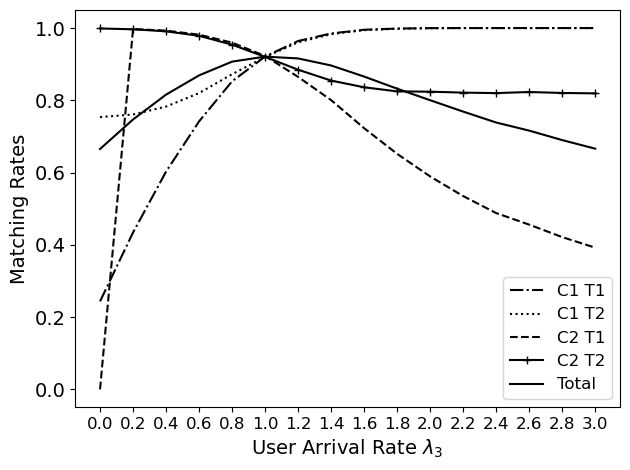

In [11]:
plt.xlabel(r'User Arrival Rate $\lambda_3$', fontsize=14)
plt.ylabel('Matching Rates', fontsize=14)
plt.plot(lambda3, CE_Match_rates, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(lambda3, EE_Match_rates, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(lambda3, JC_Match_rates,  linestyle='dashed', label = 'C2 T1', color='black')
plt.plot(lambda3, JE_Match_rates,  linestyle='solid', marker='+' , label = 'C2 T2', color='black')
plt.plot(lambda3, Total_Match_rates, linestyle='solid', label = 'Total', color='black')
plt.xticks(lambda3, fontsize=12)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Exp21_Match_long.png')
plt.show()

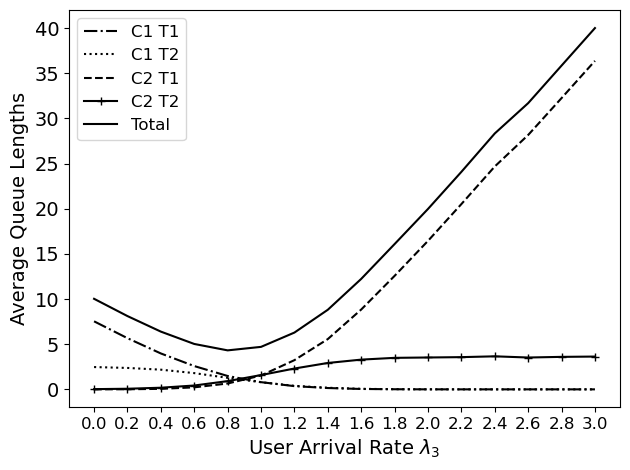

In [12]:
plt.xlabel(r'User Arrival Rate $\lambda_3$', fontsize=14)
plt.ylabel('Average Queue Lengths', fontsize=14)
plt.plot(lambda3, CE_Queue_length, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(lambda3, EE_Queue_length, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(lambda3, JC_Queue_length,  linestyle='dashed', label = 'C2 T1', color='black')
plt.plot(lambda3, JE_Queue_length,  linestyle='solid', marker='+' , label = 'C2 T2', color='black')
plt.plot(lambda3, Total_Queue_length, linestyle='solid', label = 'Total', color='black')
plt.xticks(lambda3, fontsize=12)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Exp21_Queue_long.png')
plt.show()



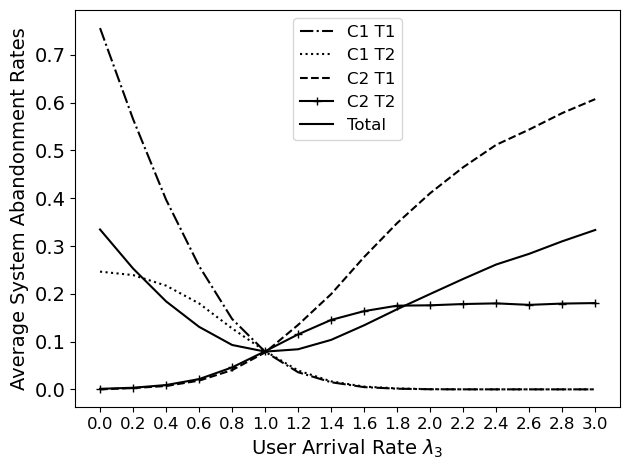

In [13]:
plt.xlabel(r'User Arrival Rate $\lambda_3$', fontsize=14)
plt.ylabel('Average System Abandonment Rates', fontsize=14)
plt.plot(lambda3, CE_Abandon_rates, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(lambda3, EE_Abandon_rates, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(lambda3, JC_Abandon_rates, linestyle='dashed', label = 'C2 T1', color='black')
plt.plot(lambda3, JE_Abandon_rates,  linestyle='solid', marker='+' , label = 'C2 T2', color='black')
plt.plot(lambda3, Total_Abandon_rates, linestyle='solid', label = 'Total', color='black')
plt.xticks(lambda3, fontsize=12)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Exp21_Abandon_long.png')
plt.show()



